In [1]:
import dowhy
from dowhy import CausalModel
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from IPython.display import Image, display

import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
from sys import path
import os

for dirname, _, filenames in os.walk("../resources/"):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath("../"))

from custom import functions

warnings.filterwarnings("ignore")

../resources/allColProSol.xlsx
../resources/dataset_a_2021.csv
../resources/dataset_a_2021c2.csv
../resources/dataset_a_2021v1.xlsx
../resources/dataset_unab_ORIGINAL SIN P1.csv
../resources/dataset_unab_P1.csv
../resources/exitoFallidoEnviosProgramaSol.xlsx
../resources/exitoFallidoProgramaSol.xlsx
../resources/exitosoFallidosEnviosAllColProSol.xlsx
../resources/exitosoFallidosEnviosAllColSol.xlsx
../resources/exitososFallidosEnviosSol.xlsx
../resources/Hito12sinColCeroExitosoFallidosSol.xlsx
../resources/sinColCeroExitosoFallidosEnviosSol.xlsx
../resources/sinColCeroExitosoFallidosSol.xlsx
../resources/v2_hitosExitoFalloColESol1.csv
../resources/v2_hitosExitoFalloColESol1Prograna.csv
../resources/v2_hitosExitoFalloSol1Programa.csv
../resources/causalidad\causalidad_e29.dot
../resources/causalidad\graph_causal_model_e29.png
../resources/causalidad\graph_causal_model_e29_with_unobserved.png
../resources/causalidad\graph_causal_model_e3.png
../resources/causalidad\graph_causal_model_e35

In [2]:
# Read and preview data
df = pd.read_csv(
    "../resources/v2_hitosExitoFalloColESol1.csv", delimiter=";", skipinitialspace=True
)

In [3]:
# creando columna aprobado y con la funcion set_in_aprobado_nota poblamos la nueva columna.
df["aprobado"] = df.apply(lambda x: functions.set_in_aprobado_nota(x["sol1"]), axis=1)
# revisamos la existencia de la nueva columna.
print(df.columns)

Index(['hito1', 'hito2', 'exitosos', 'fallidos', 'e0', 'e1', 'e2', 'e3', 'e4',
       'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15',
       'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25',
       'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35',
       'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45',
       'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'sol1', 'aprobado'],
      dtype='object')


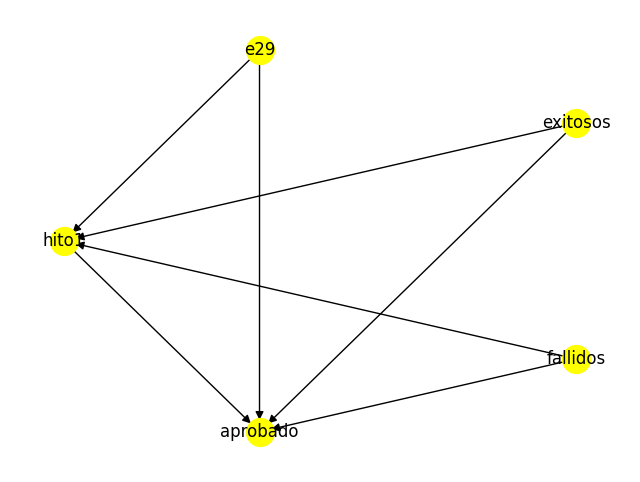

In [4]:
# Paso 1: Modelar un problema causal
model = CausalModel(
    data=df,
    treatment="hito1",  # Variable tratada (exposición)
    outcome="aprobado",  # Variable de resultado
    common_causes=[
        "fallidos",
        "exitosos",
        "e29"
    ],  # Variables de causa común
)
# Visualizar el modelo causal con la variable de causa común no observada
model.view_model(
    layout="gml",
    file_name="../resources/causalidad/graph_causal_model_hito1",
)

In [5]:
# Paso 2: Identificar el estimando objetivo bajo el modelo
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                       
────────(E[aprobado|exitosos,e29,fallidos])
d[hito₁]                                   
Estimand assumption 1, Unconfoundedness: If U→{hito1} and U→aprobado then P(aprobado|hito1,exitosos,e29,fallidos,U) = P(aprobado|hito1,exitosos,e29,fallidos)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [6]:
# Paso 3: Estimar el efecto causal usando un método basado en árboles
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.econml.dml.DML",
    control_value=0,
    treatment_value=1,
    target_units="ate",  # Average Treatment Effect
    method_params={
        "init_params": {
            "model_y": RandomForestRegressor(),
            "model_t": RandomForestRegressor(),
            "model_final": RandomForestRegressor(
                max_depth=10,
                min_samples_split=10,
                min_samples_leaf=5,
                random_state=1502,
                n_estimators=500,
            ),
            "featurizer": None,
        },
        "fit_params": {},
    },
)

print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                       
────────(E[aprobado|exitosos,e29,fallidos])
d[hito₁]                                   
Estimand assumption 1, Unconfoundedness: If U→{hito1} and U→aprobado then P(aprobado|hito1,exitosos,e29,fallidos,U) = P(aprobado|hito1,exitosos,e29,fallidos)

## Realized estimand
b: aprobado~hito1+exitosos+e29+fallidos | 
Target units: ate

## Estimate
Mean value: 0.14677867241609466
Effect estimates: [0.14677867 0.14677867 0.14677867 0.14677867 0.14677867 0.14677867
 0.14677867 0.14677867 0.14677867 0.14677867 0.14677867 0.14677867
 0.14677867 0.14677867 0.14677867 0.14677867 0.14677867 0.14677867
 0.14677867 0.14677867 0.14677867 0.14677867 0.14677867 0.14677867
 0.14677867 0.14677867 0.14677867 0.14677867 0.14677867 0.14677867
 0.14677867 0.14677867 0.14677867 0.14677867 0.14677867 0.14677867
 0.14677867 0.1467

In [7]:
# Refutador de datos aleatorios
refute1 = model.refute_estimate(
    identified_estimand, estimate, method_name="random_common_cause"
)
print(refute1)

Refute: Add a random common cause
Estimated effect:0.14677867241609466
New effect:-0.07422180240608484
p value:0.1200000000000001



In [8]:
# Refutador de causa común no observada
refute2 = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="add_unobserved_common_cause",
    confounders_effect_on_treatment="binary_flip",
    confounders_effect_on_outcome="linear",
    effect_strength_on_treatment=0.01,
    effect_strength_on_outcome=0.02,
)
print(refute2)

Refute: Add an Unobserved Common Cause
Estimated effect:0.14677867241609466
New effect:0.22214865170329545



In [9]:
# Paso 4: Refutar el estimado obtenido
refute3 = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="placebo_treatment_refuter",
    placebo_type="permute",
)
print(refute3)

Refute: Use a Placebo Treatment
Estimated effect:0.14677867241609466
New effect:0.0017028080661698447
p value:0.96

